In [1]:
import data_aug.data_aug as aug
from data_aug.bbox_util import *
import numpy as np 
import random
import cv2 
import matplotlib.pyplot as plt 
import pickle as pkl
%matplotlib inline
import os
import random
from importlib import reload
from tqdm import tqdm_notebook
import json

In [2]:
DATA_DIR = '../data'
ANNOT_EXT = '.json'
IMG_EXT = '.jpg'
IMAGE_DIR = 'images'
ANNOT_DIR = 'annotations'

In [3]:
img_files = [img_file for img_file in [files for _, _, files in os.walk(os.path.join(DATA_DIR, IMAGE_DIR))][0] if img_file.endswith(IMG_EXT)]
annt_files = [annt_file for annt_file in [files for _, _, files in os.walk(os.path.join(DATA_DIR, ANNOT_DIR))][0] if annt_file.endswith(ANNOT_EXT)]

test_img = img_files[0]
test_annt = test_img.split('.')[0] + ANNOT_EXT

img_path = os.path.join(DATA_DIR, IMAGE_DIR, test_img)
annt_path = os.path.join(DATA_DIR, ANNOT_DIR, test_annt)

print (img_path)
print (annt_path)

../data/images/101.jpg
../data/annotations/101.json


In [4]:
img = cv2.imread(img_path)[:,:,::-1]
ori_img = img.copy()
json_file = json.load(open(annt_path, 'r'))

In [5]:
all_labels = {}
all_bbox = {}
for annt_file in annt_files:
    annt_path = os.path.join(DATA_DIR, ANNOT_DIR, annt_file)
    json_file = json.load(open(annt_path, 'r'))
    labels= []
    bbox = []
    for ent in json_file['shapes']:
        label = ent['label']
        point = ent['points']
        x_vals = []
        y_vals = []
        for val in point:
            x_vals.append(val[0])
            y_vals.append(val[1])
        x_min = float(min(x_vals))
        x_max = float(max(x_vals))
        y_min = float(min(y_vals))
        y_max = float(max(y_vals))
        labels.append(label)
        lab_val = float(1) if label == 'button' else float(2)
        bbox.append([x_min, y_min, x_max, y_max, lab_val])
    all_labels[annt_file.split('.')[0]] = labels
    all_bbox[annt_file.split('.')[0]] = bbox

In [6]:
reload(aug)

<module 'data_aug.data_aug' from '/Users/murugeshvadivel/DEV/quantus/data_preprocess/data_aug/data_aug.py'>

In [7]:
total_annt_file ={}
for img_file in img_files:
    file_name = img_file.split('.')[0]
    img_save_path = 'data/images/'+file_name
    annt_save_path = 'data/annt/' + file_name
    ori_img = cv2.imread(os.path.join(DATA_DIR, IMAGE_DIR, img_file))[:,:,::-1]
    ori_bboxes = np.asarray(all_bbox[file_name])
    ###Resize
    ori_img, ori_bboxes = aug.Resize((600, 800))(ori_img.copy(), ori_bboxes.copy())
    cv2.imwrite(f"{img_save_path}.jpg", ori_img)
    total_annt_file[f"{file_name}"] =ori_bboxes.tolist()
    ###Random Flip
    flip_img, flip_bboxes = aug.RandomHorizontalFlip(60)(ori_img.copy(), ori_bboxes.copy())
    cv2.imwrite(f"{img_save_path}_1.jpg", flip_img)
    total_annt_file[f"{file_name}_1"] = flip_bboxes.tolist()
    ##scaling
    scale_x = random.uniform(0.2, 0.5)
    scale_y = random.uniform(0.3, 0.8)
    scale_img, scale_bboxes = aug.Scale(scale_x = scale_x, scale_y = scale_y)(ori_img.copy(), ori_bboxes.copy())
    cv2.imwrite(f"{img_save_path}_2.jpg", scale_img)
    total_annt_file[f"{file_name}_2"] = scale_bboxes.tolist()
    
    img, bboxes = aug.Scale(scale_x = scale_x, scale_y = scale_y)(flip_img.copy(), flip_bboxes.copy())
    cv2.imwrite(f"{img_save_path}_3.jpg", img)
    total_annt_file[f"{file_name}_3"] = bboxes.tolist()
    
    #Rotation
    img, bboxes = aug.RandomRotate(89)(ori_img.copy(), ori_bboxes.copy())
    cv2.imwrite(f"{img_save_path}_4.jpg", img)
    total_annt_file[f"{file_name}_4"] = bboxes.tolist()

    img, bboxes = aug.RandomRotate(60)(scale_img.copy(), scale_bboxes.copy())
    cv2.imwrite(f"{img_save_path}_5.jpg", img)
    total_annt_file[f"{file_name}_5"] = bboxes.tolist()
pkl.dump(total_annt_file, open(os.path.join('data/annt/', 'annotation_file.pkl'), 'wb'))

In [10]:
ori_bboxes

array([[267.85714286, 132.73809524, 280.75396825, 145.83333333,
          2.        ],
       [278.17460317, 140.47619048, 288.0952381 , 151.78571429,
          2.        ],
       [267.46031746, 156.74603175, 280.35714286, 169.84126984,
          2.        ],
       [303.76984127, 174.4047619 , 316.66666667, 187.3015873 ,
          2.        ],
       [262.1031746 , 175.5952381 , 273.21428571, 188.88888889,
          2.        ],
       [292.26190476, 186.11111111, 303.76984127, 200.99206349,
          2.        ],
       [296.03174603, 193.84920635, 309.52380952, 207.53968254,
          2.        ],
       [257.93650794, 218.65079365, 272.02380952, 233.53174603,
          2.        ],
       [286.11111111, 224.4047619 , 300.1984127 , 239.28571429,
          2.        ],
       [262.1031746 , 660.91269841, 287.3015873 , 689.08730159,
          2.        ],
       [263.69047619, 244.64285714, 278.57142857, 259.92063492,
          2.        ],
       [289.68253968, 258.73015873, 300.595

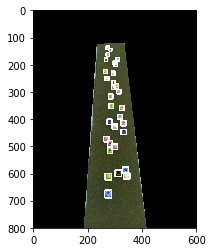

In [9]:
plotted_img = draw_rect(ori_img, ori_bboxes)
plt.imshow(plotted_img)
plt.show()

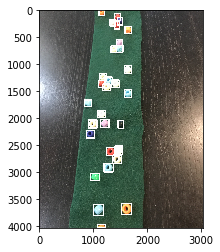

In [55]:
img_, bboxes_ = aug.RandomHorizontalFlip(89)(img.copy(), ori_bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

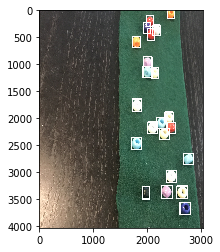

In [54]:
img_, bboxes_ = aug.Scale(scale_x = 0.3, scale_y = 0.6)(img.copy(), ori_bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

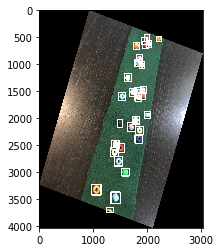

In [42]:
img_, bboxes_ = aug.RandomRotate(89)(img.copy(), ori_bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

In [41]:
test_img = cv2.imread(img_path)[:,:,::-1]

ori_bboxes = np.asarray(all_bbox[img_files[0].split('.')[0]])

In [15]:
reload(aug)

<module 'data_aug.data_aug' from '/Users/murugeshvadivel/DEV/quantus/data_preprocess/data_aug/data_aug.py'>

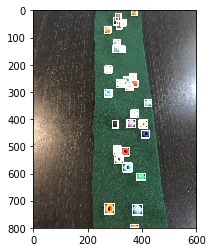

In [17]:
img_, bboxes_ = aug.Resize((600,800))(ori_img.copy(), ori_bboxes.copy())
plotted_img = draw_rect(img_, bboxes_)
plt.imshow(plotted_img)
plt.show()

In [85]:
bboxes_.tolist()

[[1106.0, 3.0, 1203.0, 103.0, 1.0],
 [1398.0, 68.0, 1500.0, 189.0, 1.0],
 [1306.0, 174.0, 1413.0, 295.0, 1.0],
 [1385.0, 211.0, 1485.0, 350.0, 1.0],
 [1442.0, 142.0, 1540.0, 276.0, 1.0],
 [1585.0, 305.0, 1703.0, 432.0, 1.0],
 [1421.0, 542.0, 1540.0, 658.0, 1.0],
 [1327.0, 661.0, 1429.0, 787.0, 1.0],
 [1421.0, 650.0, 1548.0, 784.0, 1.0],
 [1569.0, 1029.0, 1698.0, 1174.0, 1.0],
 [1121.0, 1179.0, 1237.0, 1303.0, 1.0],
 [1216.0, 1239.0, 1353.0, 1374.0, 1.0],
 [1090.0, 1303.0, 1206.0, 1426.0, 1.0],
 [1177.0, 1368.0, 1313.0, 1495.0, 1.0],
 [1342.0, 1295.0, 1479.0, 1432.0, 1.0],
 [1569.0, 1471.0, 1708.0, 1611.0, 1.0],
 [837.0, 1663.0, 971.0, 1782.0, 1.0],
 [1077.0, 1853.0, 1219.0, 1989.0, 1.0],
 [1456.0, 2042.0, 1558.0, 2184.0, 1.0],
 [1135.0, 2024.0, 1290.0, 2174.0, 1.0],
 [913.0, 2034.0, 1069.0, 2182.0, 1.0],
 [879.0, 2224.0, 1024.0, 2368.0, 1.0],
 [1400.0, 2516.0, 1542.0, 2674.0, 1.0],
 [1245.0, 2542.0, 1392.0, 2697.0, 1.0],
 [1358.0, 2682.0, 1521.0, 2839.0, 1.0],
 [1198.0, 2832.0, 1366.0,

In [88]:
annt_file = pkl.load(open('../data_preprocess/data/annt/annotation_file.pkl','rb'))

In [89]:
annt_file

{'101': [[361.3095238095238,
   0.5952380952380952,
   380.55555555555554,
   20.436507936507937,
   1.0],
  [302.38095238095235, 13.492063492063492, 322.6190476190476, 37.5, 1.0],
  [319.6428571428571,
   34.52380952380952,
   340.87301587301585,
   58.53174603174603,
   1.0],
  [305.35714285714283,
   41.86507936507936,
   325.19841269841265,
   69.44444444444444,
   1.0],
  [294.4444444444444,
   28.174603174603174,
   313.88888888888886,
   54.76190476190476,
   1.0],
  [262.1031746031746,
   60.51587301587301,
   285.515873015873,
   85.71428571428571,
   1.0],
  [294.4444444444444,
   107.53968253968253,
   318.05555555555554,
   130.55555555555554,
   1.0],
  [316.468253968254,
   131.15079365079364,
   336.70634920634916,
   156.15079365079364,
   1.0],
  [292.85714285714283,
   128.96825396825395,
   318.05555555555554,
   155.55555555555554,
   1.0],
  [263.0952380952381,
   204.16666666666666,
   288.69047619047615,
   232.93650793650792,
   1.0],
  [354.56349206349205,
   2